# Módulo 2: Estadísticas y Visualización de Datos para Indicadores

## Introducción
En esta sesión, profundizaremos en conceptos estadísticos fundamentales como los momentos estadísticos, la covarianza y la correlación. Estos conceptos son esenciales para analizar y comprender la eficacia de los Indicadores Clave de Rendimiento (KPIs) en un entorno profesional. Aprenderás a aplicar estos métodos estadísticos en Python, utilizando datos reales para calcular y visualizar la información que soporta decisiones empresariales importantes.

## Objetivos de Aprendizaje
- Comprender y calcular momentos estadísticos como la media y la varianza.
- Explorar la relación entre variables mediante la covarianza y la correlación.
- Introducción a visualización de datos

## Herramientas de Python para Análisis Estadístico y Visualización
- `numpy`: para cálculos estadísticos eficientes.
- `pandas`: para manipulación de datos.
- `matplotlib` y `seaborn`: para visualización de datos.


In [2]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

## Momentos Estadísticos: Media y Varianza

### Caso de Uso Empresarial: Análisis de Tiempos de Respuesta de Servicio al Cliente

Supongamos que una empresa está evaluando la eficiencia de su servicio al cliente. Los momentos estadísticos como la media y la varianza de los tiempos de respuesta son cruciales para entender la rapidez y consistencia del servicio.

Media de los tiempos de respuesta: 29.82 minutos
Desviación estándar de los tiempos de respuesta: 4.96 minutos


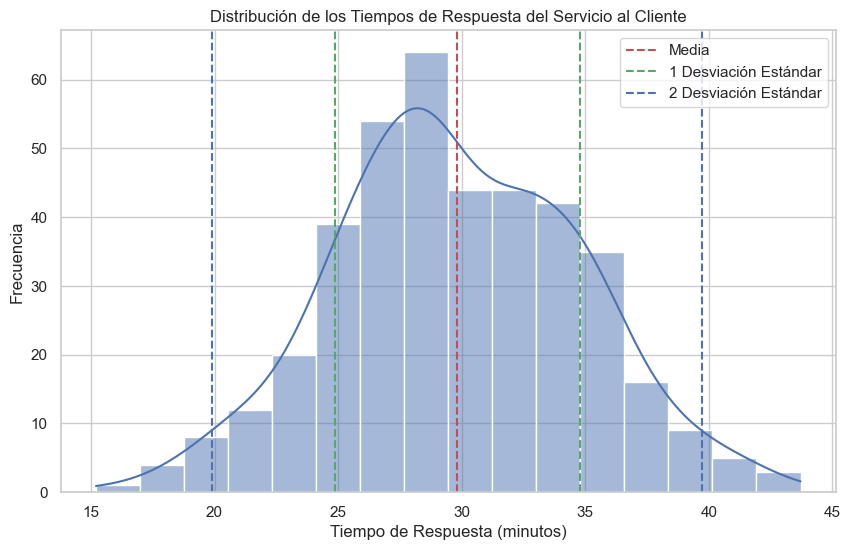

In [3]:
# Datos de ejemplo: Tiempos de respuesta al cliente en minutos
response_times = np.random.normal(loc=30, scale=5, size=400)  # Media = 30 min, SD = 5 min

# Media y Varianza
mean_response = np.mean(response_times)
std_dev_response = np.std(response_times)

# Mostrar Media y Desviación Estándar
print(f"Media de los tiempos de respuesta: {mean_response:.2f} minutos")
print(f"Desviación estándar de los tiempos de respuesta: {std_dev_response:.2f} minutos")

# Visualización de la distribución de los tiempos de respuesta
plt.figure(figsize=(10, 6))
sns.histplot(response_times, kde=True)
plt.axvline(mean_response, color='r', linestyle='--', label='Media')
plt.axvline(mean_response + std_dev_response, color='g', linestyle='--', label='1 Desviación Estándar')
plt.axvline(mean_response - std_dev_response, color='g', linestyle='--')
plt.axvline(mean_response + 2*std_dev_response, color='b', linestyle='--', label='2 Desviación Estándar')
plt.axvline(mean_response - 2*std_dev_response, color='b', linestyle='--')
plt.title('Distribución de los Tiempos de Respuesta del Servicio al Cliente')
plt.xlabel('Tiempo de Respuesta (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Covarianza y Correlación

### Caso de Uso Empresarial: Relación entre Gasto en Marketing y Nuevos Clientes

Es importante para las empresas entender cómo los gastos en marketing afectan la adquisición de nuevos clientes. Aquí, usamos la covarianza y la correlación para explorar esta relación.

Covarianza entre Gasto en Marketing y Nuevos Clientes:
                  Marketing_Spend  New_Customers
Marketing_Spend     87232.103923    5188.996196
New_Customers        5188.996196     381.220750

Correlación entre Gasto en Marketing y Nuevos Clientes:
                  Marketing_Spend  New_Customers
Marketing_Spend         1.000000       0.899823
New_Customers           0.899823       1.000000


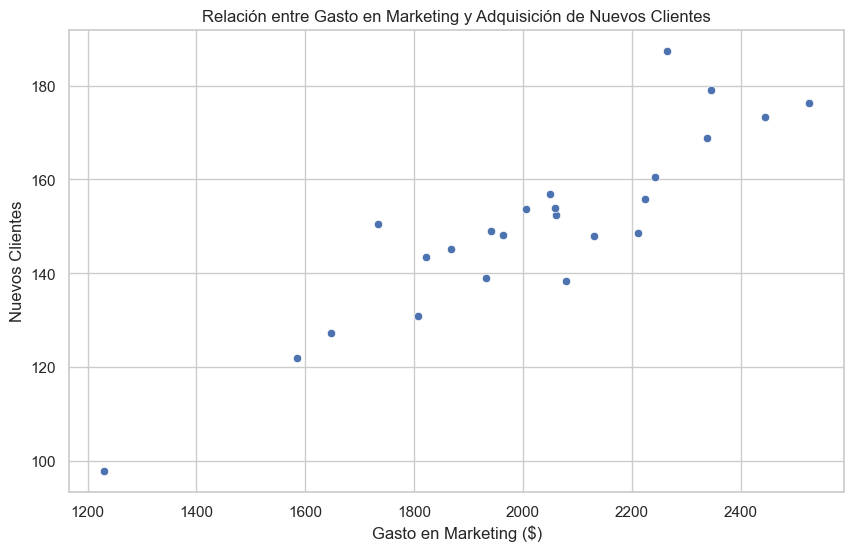

In [4]:
# Configuración de fechas para los datos simulados
months = pd.date_range(start='2021-01-01', periods=24, freq='M')

# Simulación de gastos de marketing y adquisición de clientes
marketing_spend = np.random.normal(loc=2000, scale=300, size=len(months))  # en dólares
new_customers = marketing_spend / 20 + np.random.normal(loc=50, scale=10, size=len(months))  # número de clientes

# DataFrame para el análisis
monthly_data = pd.DataFrame({
    'Month': months,
    'Marketing_Spend': marketing_spend,
    'New_Customers': new_customers
})

# Covarianza y Correlación
print("Covarianza entre Gasto en Marketing y Nuevos Clientes:\n", monthly_data[['Marketing_Spend', 'New_Customers']].cov())
print("\nCorrelación entre Gasto en Marketing y Nuevos Clientes:\n", monthly_data[['Marketing_Spend', 'New_Customers']].corr())

# Visualización de la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing_Spend', y='New_Customers', data=monthly_data[['Marketing_Spend', 'New_Customers']])
plt.title('Relación entre Gasto en Marketing y Adquisición de Nuevos Clientes')
plt.xlabel('Gasto en Marketing ($)')
plt.ylabel('Nuevos Clientes')
plt.show()


La anterior visualización es ideal para cuando estas analizando los datos de manera interna intentando descubrir relaciones. Sin embargo, en sesiones con lideres de negocio puede que estén mas acostumbrados a ver el siguiente tipo de visualización:

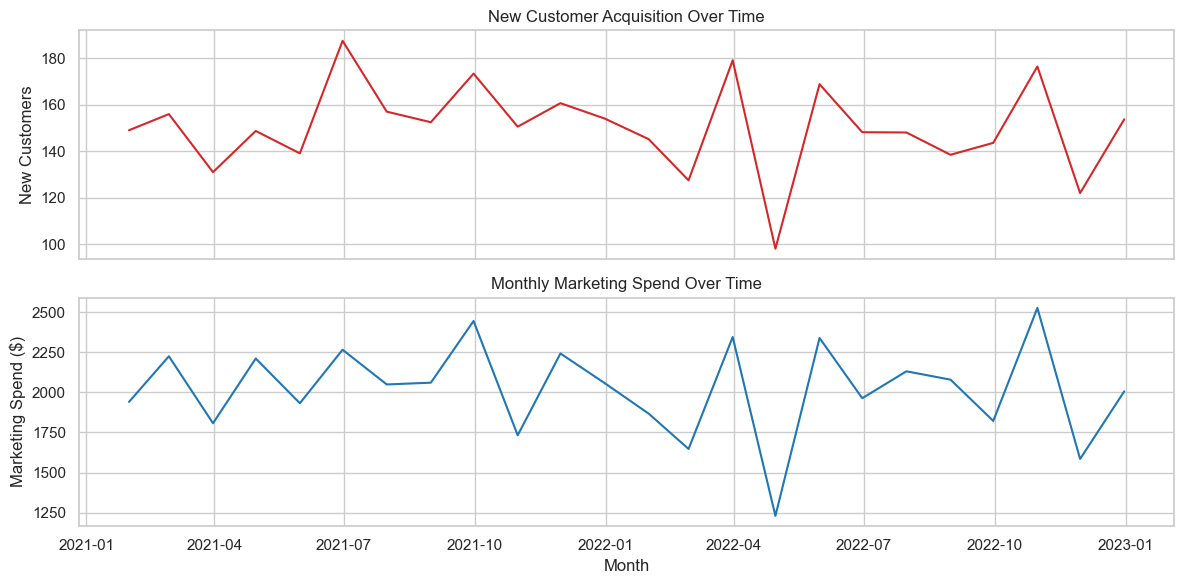

In [5]:
# Visualización de tendencias en dos filas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Gráfico de nuevos clientes
ax1.plot(monthly_data['Month'], monthly_data['New_Customers'], color='tab:red')
ax1.set_ylabel('New Customers')
ax1.set_title('New Customer Acquisition Over Time')
ax1.grid(True)

# Gráfico de gastos de marketing
ax2.plot(monthly_data['Month'], monthly_data['Marketing_Spend'], color='tab:blue')
ax2.set_ylabel('Marketing Spend ($)')
ax2.set_title('Monthly Marketing Spend Over Time')
ax2.grid(True)

# Ajustando el diseño
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## Visualización de Datos: Scatter Plot

Un scatter plot es útil para visualizar la relación entre dos variables numéricas. Observemos cómo se relacionan `X` y `Y`.


In [8]:
monthly_data.head(2)

,Month,Marketing_Spend,New_Customers
0,2021-01-31,1940.412840,148.945650
1,2021-02-28,2224.498944,155.884892


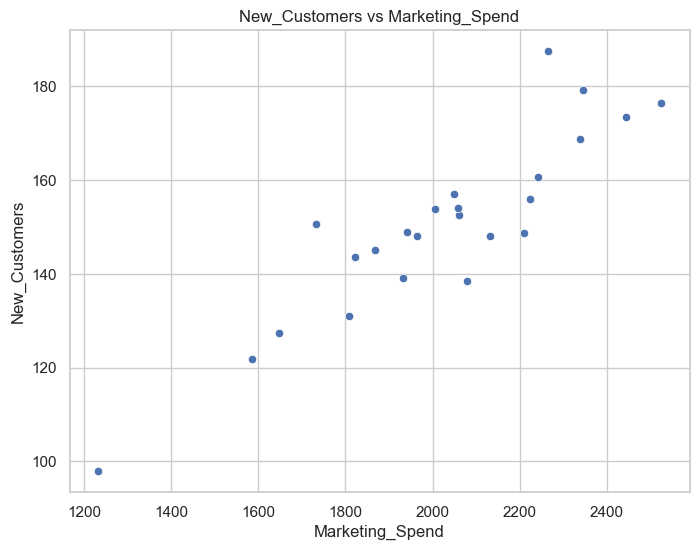

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing_Spend', y='New_Customers', data=monthly_data)
plt.title('New_Customers vs Marketing_Spend')
plt.xlabel('Marketing_Spend')
plt.ylabel('New_Customers')
plt.grid(True)
plt.show()
